# Exploratory Data Analysis On Movie Data

## Table of Contents
<ul>
<li><a href="#statement">Problem Statement</a></li>
<li><a href="#loading">Data loading and Description</a></li>
<li><a href="#profiling">Data Profiling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='statement'></a>
## Problem Statement

We have around 1000 movie data.Dataset provides some metrics that measure how successful these movies are. These metrics include voting average,popularity and the revenue. It also contains some basic information corresponding to the movie like cast, director,runtime, genre, etc. Any of the these information can be a key to the success of movie.

Lets determine the factors which make a movie profitable,Indeed the recipe to make a blockbuster movie?

<a id='loading'></a>
## Data loading and Description

Cinema has always been an Interesting topic,thus the dataset too. It contains plentiful information for exploring the properties that are associated with successful movies.

Features for Evaluating the Success of Movies
- popularity
- vote average score
- revenue

Potential Key/Features to Affect the Success of a Movie
- Budget
- Cast
- Director
- Runtime
- Genres
- Production Companies
- Release Date
- Vote Average

#### Importing packages and loading data  

In [1]:
!pip install pandas_profiling

In [65]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
% matplotlib inline

# Importing training dataset using pd.read_csv
movie_data = pd.read_csv('C:\\data\\1000 movies data.csv') 

<a id='profiling'></a>
## Data Profiling

#### Understanding data

In [66]:
#see the column info and null values in the dataset
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
Rank            1000 non-null int64
Genre           1000 non-null object
Description     1000 non-null object
Director        1000 non-null object
Actors          1000 non-null object
Year            1000 non-null int64
Runtime         1000 non-null int64
Rating          1000 non-null float64
Votes           1000 non-null int64
Revenue         876 non-null float64
Metascore       936 non-null float64
Budget          613 non-null float64
Vote_Average    678 non-null float64
Popularity      677 non-null float64
Title           1000 non-null object
dtypes: float64(6), int64(4), object(5)
memory usage: 117.3+ KB


From the table above, there are totally 1000 entries and total 14 columns. And there exists some null value in the revenue,metascore,budget,popularity column.

In [67]:
#descriptive statistics for the data set.
movie_data.describe()

,Rank,Year,Runtime,Rating,Votes,Revenue,Metascore,Budget,Vote_Average,Popularity
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,8.760000e+02,936.000000,6.130000e+02,678.000000,677.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,8.407116e+04,58.985043,1.103154e+08,6.494100,2.355988
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,2.244572e+06,17.194757,6.961217e+08,0.757841,2.650978
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000e+00,11.000000,0.000000e+00,3.100000,0.039953
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,1.327000e+01,47.000000,2.100000e+07,6.100000,0.969354
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,4.798500e+01,59.500000,4.500000e+07,6.500000,1.640237
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,1.141975e+02,72.000000,1.080000e+08,7.000000,2.819750
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,6.600997e+07,100.000000,1.221550e+10,8.200000,32.985763


I assume the zero value in revenue and budget columns are missing values. 

To decide whether to drop them out or set them as null values, will  count the number of the zero values in the columns.

In [68]:
df_revenue_count =  movie_data.groupby('Revenue').count()['Rank']
df_revenue_count.head(1)

Revenue
0.0    1
Name: Rank, dtype: int64

In [69]:
df_budget_count =  movie_data.groupby('Budget').count()['Rank']
df_budget_count.head(1)

Budget
0.0    2
Name: Rank, dtype: int64

Its just has a small number of zero value rows in both the columns, so I decided to drop it.

#### Cleaning decision summary
1. Drop unnecessary columns for answering those questions : `description`, `title`.
2. Drop duplicates(if any)
3. Drop zero values columns that with small quantity of zeros : `revenue`,`budget`.


#### 1. drop unncessary columns : `description`,`title`

In [70]:
col = ['Description', 'Title']
movie_data.drop(col, axis=1,inplace=True)

#### 2. changing the type of popularity column

In [71]:
change_cols=['Popularity','Vote_Average']
movie_data[change_cols]=movie_data[change_cols].applymap(np.float64)
movie_data.dtypes

Rank              int64
Genre            object
Director         object
Actors           object
Year              int64
Runtime           int64
Rating          float64
Votes             int64
Revenue         float64
Metascore       float64
Budget          float64
Vote_Average    float64
Popularity      float64
dtype: object

#### 3. drop duplicates

In [72]:
movie_data = movie_data.drop_duplicates(keep='first')

In [73]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
Rank            1000 non-null int64
Genre           1000 non-null object
Director        1000 non-null object
Actors          1000 non-null object
Year            1000 non-null int64
Runtime         1000 non-null int64
Rating          1000 non-null float64
Votes           1000 non-null int64
Revenue         876 non-null float64
Metascore       936 non-null float64
Budget          613 non-null float64
Vote_Average    678 non-null float64
Popularity      677 non-null float64
dtypes: float64(6), int64(4), object(3)
memory usage: 109.4+ KB


#### 4. drop column with small quantity of zero value: revenue,budget

In [74]:
#filtering
movie_data.query('Revenue != 0', inplace=True)
movie_data.query('Budget != 0', inplace=True)

#checking
movie_data.query('Revenue == 0')
movie_data.query('Budget == 0')


,Rank,Genre,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Budget,Vote_Average,Popularity


In [75]:
movie_data.describe()

,Rank,Year,Runtime,Rating,Votes,Revenue,Metascore,Budget,Vote_Average,Popularity
count,997.000000,997.000000,997.000000,997.000000,9.970000e+02,8.730000e+02,934.000000,6.110000e+02,676.000000,675.000000
mean,500.286861,2012.780341,113.221665,6.725176,1.702647e+05,8.436007e+04,59.024625,1.106765e+08,6.495710,2.360197
std,288.921203,3.208437,18.816916,0.945396,1.888617e+05,2.248424e+06,17.186214,6.972332e+08,0.758144,2.653759
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,1.000000e-02,11.000000,6.500000e+05,3.100000,0.039953
25%,251.000000,2010.000000,100.000000,6.200000,3.703300e+04,1.365000e+01,47.000000,2.200000e+07,6.100000,0.971907
50%,500.000000,2014.000000,111.000000,6.800000,1.115580e+05,4.804000e+01,60.000000,4.500000e+07,6.500000,1.647017
75%,750.000000,2016.000000,123.000000,7.400000,2.403230e+05,1.156000e+02,72.000000,1.090000e+08,7.000000,2.842717
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,6.600997e+07,100.000000,1.221550e+10,8.200000,32.985763


### Cleaning Result Summary

In [76]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 999
Data columns (total 13 columns):
Rank            997 non-null int64
Genre           997 non-null object
Director        997 non-null object
Actors          997 non-null object
Year            997 non-null int64
Runtime         997 non-null int64
Rating          997 non-null float64
Votes           997 non-null int64
Revenue         873 non-null float64
Metascore       934 non-null float64
Budget          611 non-null float64
Vote_Average    676 non-null float64
Popularity      675 non-null float64
dtypes: float64(6), int64(4), object(3)
memory usage: 109.0+ KB


we can see that the data now with 997 entries and 14 columns. Each column are almost clear without too many null values.My cleaning goal is also to keep the data integrity from the original one. Although there are some null values in `budget`,`revenue`,`popularity`,`vote_average`  columns, it is still useful for analysis, and in fact the number of their null values are not very huge, so I decided to keep them.

In [77]:
movie_data.describe()

,Rank,Year,Runtime,Rating,Votes,Revenue,Metascore,Budget,Vote_Average,Popularity
count,997.000000,997.000000,997.000000,997.000000,9.970000e+02,8.730000e+02,934.000000,6.110000e+02,676.000000,675.000000
mean,500.286861,2012.780341,113.221665,6.725176,1.702647e+05,8.436007e+04,59.024625,1.106765e+08,6.495710,2.360197
std,288.921203,3.208437,18.816916,0.945396,1.888617e+05,2.248424e+06,17.186214,6.972332e+08,0.758144,2.653759
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,1.000000e-02,11.000000,6.500000e+05,3.100000,0.039953
25%,251.000000,2010.000000,100.000000,6.200000,3.703300e+04,1.365000e+01,47.000000,2.200000e+07,6.100000,0.971907
50%,500.000000,2014.000000,111.000000,6.800000,1.115580e+05,4.804000e+01,60.000000,4.500000e+07,6.500000,1.647017
75%,750.000000,2016.000000,123.000000,7.400000,2.403230e+05,1.156000e+02,72.000000,1.090000e+08,7.000000,2.842717
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,6.600997e+07,100.000000,1.221550e+10,8.200000,32.985763


After deleting the zero values of revenue and budget, we can see the minimum values are more reasonable,

<a id='eda'></a>
## Exploratory Data Analysis

- <a href="#q1">Question 1: Number of movie released year by year.</a>

- <a href="#q2">Question 2: Popularity Over Years.</a>
   
- <a href="#q3">Question 3: Genres Trends by Year.</a>

- <a href="#q4">Question 4: Properties associated with movies that have high popularity in recent years?</a>

  - <a href="#q4.1">Question 4.1: Is revenue associated with movies popularity </a>
   
  - <a href="#q4.2">Question 4.2: Is budget associated with movies that have high popularity?</a>
    
  - <a href="#q4.3">Question 4.3: Is runtime associated with movies that have high popularity on average?</a>
    
  - <a href="#q4.4">Question 4.4: What casts, directors, genres associated with high popularity?</a>
  
    
- <a href="#q5">Question 5: Properties associated with movies that have high voting score in recent years</a>

  - <a href="#q5.1">Question 5.1: Is revenue affecting the score rating of the movie</a>
    
  - <a href="#q5.2">Question 5.2: Is budget associated with movies that have high score?</a>
   
  - <a href="#q5.3">Question 5.3: Is runtime associated with movies that have high score?</a>
   
  - <a href="#q5.4">Question 5.4: What casts, directors, genres associated with high score?</a>

<a id='q1'></a>
## Question 1: Number of movie released

In [78]:
movie_count = movie_data.groupby('Year').count()['Rank']
movie_count.head(11)

Year
2006     44
2007     53
2008     52
2009     51
2010     60
2011     62
2012     64
2013     91
2014     97
2015    127
2016    296
Name: Rank, dtype: int64

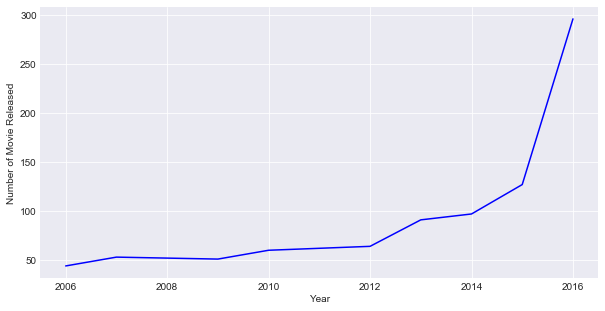

In [79]:
# Visualize the result
sns.set_style('darkgrid')
x = movie_count.index
y = movie_count
plt.figure(figsize=(10, 5))
#plot line chart 
plt.plot(x, y, color = 'b')
plt.xlabel('Year')
plt.ylabel('Number of Movie Released');

We can see that the number of movie released are increasing by years since the curve is concave upward. 

<a id='q2'></a>
## Question 2: Popularity Over Years

Also have calculated the median of popularity in case if the mean is affected by the outlier

In [80]:
p_mean = movie_data.groupby('Year').mean()['Popularity']
p_mean.tail()

Year
2012    2.543002
2013    1.981824
2014    3.668101
2015    3.047658
2016    0.683555
Name: Popularity, dtype: float64

In [81]:
p_median = movie_data.groupby('Year').median()['Popularity']
p_median.tail()

Year
2012    1.653924
2013    1.405720
2014    2.791507
2015    2.075821
2016    0.442242
Name: Popularity, dtype: float64

In [82]:
#Visualize the result
index_mean = p_mean.index
index_median = p_median.index

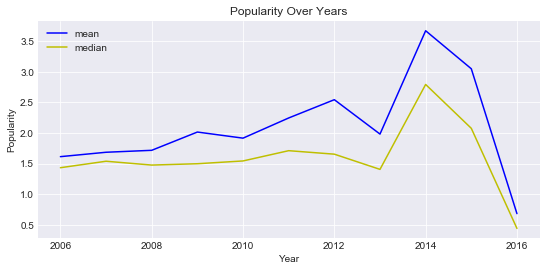

In [83]:
sns.set_style('darkgrid')
x1, y1 = index_mean, p_mean
x2, y2 = index_median, p_median
plt.figure(figsize=(9, 4))
plt.plot(x1, y1, color = 'b', label = 'mean')
plt.plot(x2, y2, color = 'y', label = 'median')
plt.title('Popularity Over Years')
plt.xlabel('Year')
plt.ylabel('Popularity');
plt.legend(loc='upper left')

We can conclude that on average, popularity over years is going up in recent years. The trend is reasonable due to the eaiser access of movie information nowadays. Moreover, in the Internet age, people can easily watch the content through different sources.

<a id='q3'></a>
## Question 3: Genres Trend By Year

In [84]:
# split genres with ',' character and count the number of times it appeared
def find_top(dataframe_col, num):
    genres = dataframe_col.str.cat(sep=',').split(',')
    new = pd.DataFrame({'top' :genres})
    top = new['top'].value_counts().head(num)
    return top

year = [[2006], [2007], [2008], [2009], [2010],[2011], [2012], [2013], [2014], [2015], [2016]]
top_genre = pd.DataFrame()

for s in year:
    dfn1 = movie_data[movie_data.Year.isin(s)] 
    dfn2 = pd.DataFrame({'year' :s,'top': find_top(dfn1.Genre,1)})
    top_genre = top_genre.append(dfn2)
top_genre
    

,top,year
Drama,26,2006
Drama,28,2007
Action,24,2008
Drama,23,2009
Drama,26,2010
Drama,29,2011
Drama,28,2012
Drama,44,2013
Drama,49,2014
Drama,74,2015


Text(0.5,1,'Genres Trends by Year')

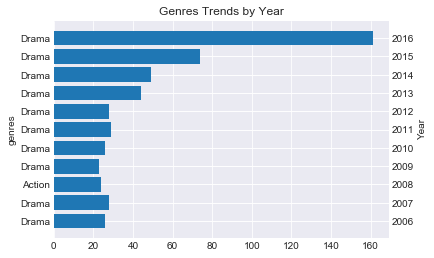

In [85]:
# Visualise the result
names = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]
genres = top_genre.index
y_pos = np.arange(len(names))
fig, ax = plt.subplots()
y1 = top_genre.top

y2 = top_genre.top
ax.barh(y_pos,y1)
ax.set_yticks(y_pos)
ax.set_yticklabels(genres)
ax.set_ylabel('genres')

ax2 = ax.twinx()
ax2.barh(y_pos,y2)
ax2.set_yticks(y_pos)
ax2.set_yticklabels(names)
ax2.set_ylabel('Year')

ax.set_title('Genres Trends by Year')

genre Drama are the most filmed in all the years

<a id='q4'></a>
## Question 4: Properties associated with movies that have high popularity in recent years

<a id='q4.1'></a>
### Question 4.1: Is revenue associated with movies popularity 

We cannot infer that the trend up is related to popularity just by looking the revenue trend line chart year by year.

Hence, it leads me that what to find out the distribution of popularity look like in terms of different revenue levels. Revenue data contains wide range so lets divide the revenue data into five levels: Low, Medium, Moderately High, High according to their quartile.

In [86]:
#function to divide the revenue data into levels
def divide_quantile(dfname ,column_name):
    min_value = dfname[column_name].min()
    first_quantile = dfname[column_name].describe()[4]
    second_quantile = dfname[column_name].describe()[5]
    third_quantile = dfname[column_name].describe()[6]
    max_value = dfname[column_name].max()

    bin_edges = [ min_value, first_quantile, second_quantile, third_quantile, max_value]
    bin_names = [ 'Low', 'Medium', 'Moderately High', 'High'] 
    
# Creates revenue_levels column with same rows as revenue column
    name = '{}_levels'.format(column_name)
    dfname[name] = pd.cut(dfname[column_name], bin_edges, labels=bin_names, include_lowest = True)
    return dfname

In [87]:
#choose the recent few years 
dfyear =[2012,2013,2014,2015,2016]
new_df = pd.DataFrame()

for year in dfyear:
    dfn1 = movie_data.query('Year == "%s"' % year) 
    dfn2 = divide_quantile(dfn1,'Revenue')  
    new_df = new_df.append(dfn2) 


C:\Users\sheifali.agarwal\AppData\Local\Continuum\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [88]:
# group the dataframe new_df with each revenue levels in each year
new_df = new_df.groupby(['Year','Revenue_levels']).median()
new_df.head(4)

Rank  Runtime  Rating     Votes  Revenue  Metascore  \
Year Revenue_levels                                                          
2012 Low              650.0    113.0    7.15  174189.5   17.210       63.0   
     Medium           633.0     98.5    6.45  159244.0   51.860       48.5   
     Moderately High  441.0    123.0    6.85  236017.5   89.385       66.0   
     High             303.5    139.0    7.30  453183.0  227.955       68.5   

                           Budget  Vote_Average  Popularity  
Year Revenue_levels                                          
2012 Low               17000000.0          6.55    1.169834  
     Medium            30000000.0          6.00    1.374300  
     Moderately High   68250000.0          6.15    1.988952  
     High             167500000.0          6.70    3.664694

Year  Revenue_levels
2012  Low               1.169834
2013  Low               0.955601
2014  Low               1.872619
2015  Low               1.065888
2016  Low               0.560348
Name: Popularity, dtype: float64


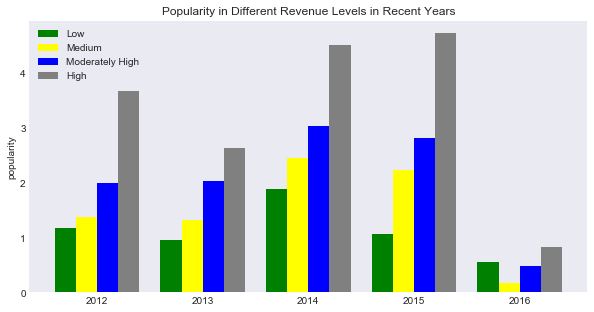

In [89]:
#Visualise the result

# Setting the positions and width for the bars
pos = list(range(len(new_df.query('Revenue_levels =="Low"'))))
width = 0.2 
fig, ax = plt.subplots(figsize=(10,5))
print( new_df.query('Revenue_levels =="Low"')['Popularity'])
# Create a bar with Low data, in position pos,
plt.bar(pos, 
        new_df.query('Revenue_levels =="Low"')['Popularity'], 
        width, 
        color='green', 
        label= 'Low') 

plt.bar([(p + width) for p in pos], 
        #using Medium data,
        new_df.query('Revenue_levels =="Medium"')['Popularity'],
        width, 
        color='yellow', 
        label='Medium') 

plt.bar([p + width*2 for p in pos], 
        new_df.query('Revenue_levels =="Moderately High"')['Popularity'], 
        width, 
        color='blue', 
        label='Moderately High') 

plt.bar([p + width*3 for p in pos], 
        new_df.query('Revenue_levels =="High"')['Popularity'], 
        width, 
        color='grey', 
        label='High')

ax.set_ylabel('popularity')
ax.set_title('Popularity in Different Revenue Levels in Recent Years')

ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels([2012,2013,2014,2015,2016])

plt.legend( loc='upper left')
plt.grid()
plt.show()

I infer that a high revenue movie is always with a higher popularity than movies with lower revenue levels and that is reasonable.So if we define success of a movie is it's revenue, one property it has is the high popularity.

<a id='q4.2'></a>
### Question 4.2: Is budget associated with movies that have high popularity

In [90]:
df = divide_quantile(movie_data,'Budget')
df_mean = df.groupby('Budget_levels')['Popularity'].mean()
df_mean 

Budget_levels
Low                1.827118
Medium             1.981672
Moderately High    2.227467
High               4.283168
Name: Popularity, dtype: float64

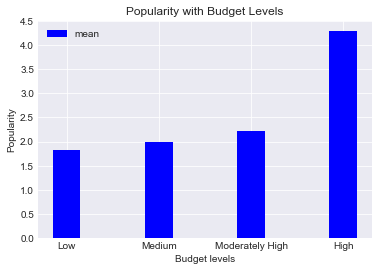

In [91]:
index = np.arange(len(df_mean))  
width = 0.3     
sns.set_style('darkgrid')

bars = plt.bar(index,df_mean, width, color='blue',label='mean')

plt.ylabel('Popularity')
plt.xlabel('Budget levels')
plt.title('Popularity with Budget Levels')
locations = index
labels = df_mean.index  
plt.xticks(locations, labels)

plt.legend() 

we can see that movies with higher popularity are with higher budget level and that is reasonable since movies with higher popularity may has a higher promoting advertising cost. With high promotion level people always have more probability to get know these movies. 

<a id='q4.3'></a>
### Question 4.3: Is runtime associated with movies that have high popularity on average

In [92]:
df = divide_quantile(movie_data,'Runtime')
df_median = df.groupby('Runtime_levels')['Popularity'].median()
df_median

Runtime_levels
Low                1.246420
Medium             1.483329
Moderately High    1.800356
High               2.422923
Name: Popularity, dtype: float64

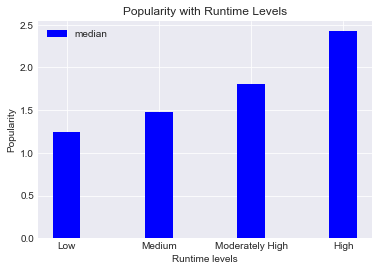

In [93]:
index = np.arange(len(df_median))  
width = 0.3     
sns.set_style('darkgrid')

bars = plt.bar(index,df_median, width, color='blue',label='median')

plt.ylabel('Popularity')
plt.xlabel('Runtime levels')
plt.title('Popularity with Runtime Levels')
locations = index
labels = df_median.index  
plt.xticks(locations, labels)

plt.legend()

We can see that the higher popularity movies has longer run time.

<a id='q4.4'></a>
### Question 4.4: What casts, directors, genres associated with high popularity

In [94]:
# Select Top 200 popular movies.
df_top = movie_data.sort_values(['Year','Popularity'], ascending=[True, False])
df_top = df_top.groupby('Year').head(200).reset_index(drop=True)

# the last 200 popular movies in every year
df_low = movie_data.sort_values(['Year','Popularity'], ascending=[True, True])
df_low = df_low.groupby('Year').head(200).reset_index(drop=True)

In [95]:
c = find_top(df_top.Actors,num=3)
d = find_top(df_top.Director,num=3)
g = find_top(df_top.Genre,num=3)

#create a dataframe.
df_popular = pd.DataFrame({'p_cast': c.index, 'p_director': d.index,'p_genres': g.index})
print(df_popular)


             p_cast          p_director p_genres
0    Christian Bale        Ridley Scott    Drama
1     Mark Wahlberg  M. Night Shyamalan   Action
2   Woody Harrelson         Michael Bay   Comedy


In [96]:
act = find_top(df_low.Actors,3)
dir = find_top(df_low.Director,3)
gen = find_top(df_low.Genre,3)

#create a dataframe.
df_unpopular = pd.DataFrame({'u_cast': act.index, 'u_director': dir.index,'u_Genres': gen.index})
print(df_unpopular)

  u_Genres          u_cast          u_director
0    Drama  Christian Bale        Ridley Scott
1   Action   Mark Wahlberg  Paul W.S. Anderson
2   Comedy       Brad Pitt         David Yates


 we can see in the table above Cast `Mark Wahlberg`,`Christian Bale` appeared in both popular and unpopular movies(I think they do have the huge popularity in past years);
 Director `Ridley Scott` and `David Yates` appeared in both popular and unpopular movies(They got many awards and honors for their high quality and popular work)
 All three genres `Drama`, `Comedy`, `Action` appeared in both popular and unpopular movies(Inferred that these genres are common in the movie industry.)



<a id='q5'></a>
## Question 5: Properties associated with movies that have high voting score in recent years

<a id='q5.1'></a>
### Question 5.1: Is revenue affecting the voting score of the movie

In [97]:
# group the dataframe new_df with each revenue levels in each year
new_df = new_df.groupby(['Year','Revenue_levels']).mean()
new_df.head(4)

Rank  Runtime  Rating     Votes  Revenue  Metascore  \
Year Revenue_levels                                                          
2012 Low              650.0    113.0    7.15  174189.5   17.210       63.0   
     Medium           633.0     98.5    6.45  159244.0   51.860       48.5   
     Moderately High  441.0    123.0    6.85  236017.5   89.385       66.0   
     High             303.5    139.0    7.30  453183.0  227.955       68.5   

                           Budget  Vote_Average  Popularity  
Year Revenue_levels                                          
2012 Low               17000000.0          6.55    1.169834  
     Medium            30000000.0          6.00    1.374300  
     Moderately High   68250000.0          6.15    1.988952  
     High             167500000.0          6.70    3.664694

Year  Revenue_levels
2012  Low               6.55
2013  Low               6.60
2014  Low               6.45
2015  Low               6.15
2016  Low               6.40
Name: Vote_Average, dtype: float64


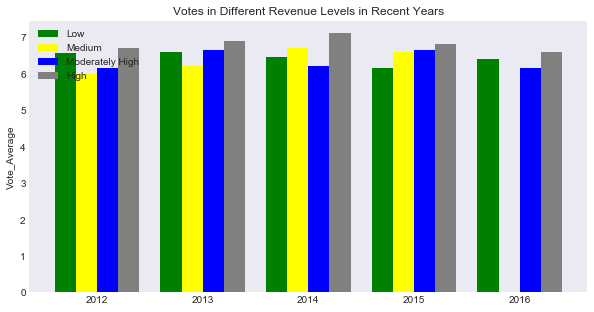

In [98]:
#Visualise the result

# Setting the positions and width for the bars
pos = list(range(len(new_df.query('Revenue_levels =="Low"'))))
width = 0.2 
fig, ax = plt.subplots(figsize=(10,5))
print( new_df.query('Revenue_levels =="Low"')['Vote_Average'])
# Create a bar with Low data, in position pos,
plt.bar(pos, 
        new_df.query('Revenue_levels =="Low"')['Vote_Average'], 
        width, 
        color='green', 
        label= 'Low') 

plt.bar([(p + width) for p in pos], 
        new_df.query('Revenue_levels =="Medium"')['Vote_Average'],
        width, 
        color='yellow', 
        label='Medium') 

plt.bar([p + width*2 for p in pos], 
        new_df.query('Revenue_levels =="Moderately High"')['Vote_Average'], 
        width, 
        color='blue', 
        label='Moderately High') 

plt.bar([p + width*3 for p in pos], 
        new_df.query('Revenue_levels =="High"')['Vote_Average'], 
        width, 
        color='grey', 
        label='High')

ax.set_ylabel('Vote_Average')
ax.set_title('Votes in Different Revenue Levels in Recent Years')

ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels([2012,2013,2014,2015,2016])

plt.legend( loc='upper left')
plt.grid()
plt.show()

we can see that there is no big difference of movie rating between each revenue level. So it can be concluded that the high revenue movies don't have the significant high score rating.

<a id='q5.2'></a>
### Question 5.2: Is budget associated with movies that have high score

In [99]:
df = divide_quantile(movie_data,'Budget')
df_mean_b = df.groupby('Budget_levels')['Vote_Average'].mean()
df_mean_b

Budget_levels
Low                6.629687
Medium             6.538571
Moderately High    6.460870
High               6.518841
Name: Vote_Average, dtype: float64

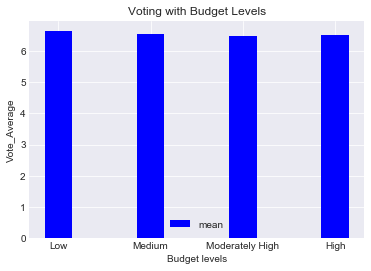

In [100]:
index_b = np.arange(len(df_mean_b))  
width = 0.3     
sns.set_style('darkgrid')

bars = plt.bar(index_b,df_mean_b, width, color='blue',label='mean')

plt.ylabel('Vote_Average')
plt.xlabel('Budget levels')
plt.title('Voting with Budget Levels')
locations = index_b
labels = df_mean.index  
plt.xticks(locations, labels)

plt.legend() 

We can see that there is no big difference in rating at different budget levels. So from the result, maybe high budget of a movie is not necessary for a good quality of movie..

<a id='q5.3'></a>
### Question 5.3: Is runtime associated with movies that have high score on average

In [101]:
df_mean_r = df.groupby('Runtime_levels')['Vote_Average'].mean()
df_mean_r

Runtime_levels
Low                6.230065
Medium             6.363636
Moderately High    6.554598
High               6.779348
Name: Vote_Average, dtype: float64

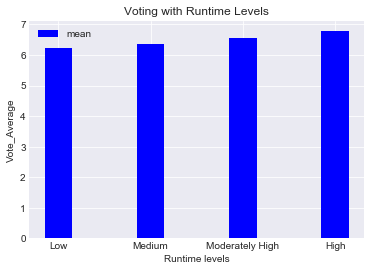

In [102]:
index_r = np.arange(len(df_mean_r))  
width = 0.3     
sns.set_style('darkgrid')

bars = plt.bar(index_r,df_mean_r, width, color='blue',label='mean')

plt.ylabel('Vote_Average')
plt.xlabel('Runtime levels')
plt.title('Voting with Runtime Levels')
locations = index_r
labels = df_mean_r.index
plt.xticks(locations, labels)

plt.legend()
plt.show()

We can see that there is no big difference in average voting score in different runtime levels. So from the result, maybe long runtime of a movie is not necessary to a good quality of movie..

<a id='q5.4'></a>
### Question 5.4: What casts, directors, genres associated with high score

In [103]:
#Top 200 with higher votes movies.
df_top_v = movie_data.sort_values(['Year','Vote_Average'], ascending=[True, False])
df_top_v = df_top.groupby('Year').head(200).reset_index(drop=True)

#Last 200 votes movies.
df_low_v = movie_data.sort_values(['Year','Vote_Average'], ascending=[True, True])
df_low_v = df_low.groupby('Year').head(200).reset_index(drop=True)

In [104]:
c_v = find_top(df_top_v.Actors,num=3)
d_v = find_top(df_top_v.Director,num=3)
g_v = find_top(df_top_v.Genre,num=3)

#create a dataframe.
df_popular_v = pd.DataFrame({'h_cast': c_v.index, 'h_director': d_v.index,'h_genres': g_v.index})
print(df_popular_v)

             h_cast          h_director h_genres
0    Christian Bale        Ridley Scott    Drama
1     Mark Wahlberg  M. Night Shyamalan   Action
2   Woody Harrelson         Michael Bay   Comedy


In [105]:
act = find_top(df_low_v.Actors,3)
dir = find_top(df_low_v.Director,3)
gen = find_top(df_low_v.Genre,3)

#create a dataframe.
df_unpopular_v = pd.DataFrame({'l_cast': act.index, 'l_director': dir.index,'l_Genres': gen.index})
print(df_unpopular_v)

  l_Genres          l_cast          l_director
0    Drama  Christian Bale        Ridley Scott
1   Action   Mark Wahlberg  Paul W.S. Anderson
2   Comedy       Brad Pitt         David Yates


`Ridley Scott` and `David Yates` have made top quality movies on average over the past years.

`Mark Wahlberg` and `Christian Bale`, they are known for their good work and do have the huge popularity .

<a id='conclusion'></a>
## Conclusion

- This was a very interesting data analysis. I came out with the following interesting facts for a movie to be successful :

    - Initially explored few of the general questions. The result turned out to be:-
 
         - The number of movie released are increasing. It is accelerated growth trend.
         - Movie popularity trend is growing on an average. 
         - Genre Drama are the most filmed in almost all years.
         
    - Moreover, I focused on properties that are associated with high popularity movies and found movies with higher         revenue level are with higher popularity in recent years on average and also with high budget levels and longer       run time.
 
         - Cast associated with high popularity movies are `Mark Wahlberg`,`Christian Bale`; director associated are             `Ridley Scott` and `David Yates`; genres associated with high popularity movies are `Drama`, `Comedy`,                 `Action` but they also appeared in the most unpopular movies.
       
    - Next I focused on what are the properties that are associated with high voting score and found movies with             higher revenue level don't have the significant high score rating in recent years,resulted me to know more             about the properties that are affects the rating of the movie.
    
         - Runtime and budget don't have obvious significance on high rating.In other words, low budget may still have            a high rating. 
 
         - Director `Martin Scorsese` and `Clint Eastwood` have made top quality movies on average over the past few               years ; `Mark Wahlberg` and `Christian Bale`, they have a huge popularity for their good work.
   
